Jeśli nie masz pobranego pakietu z listy `Imports`, to odkomentuj linijkę z nazwą pakietu z poniższej komórki.

In [2]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install warnings
# !pip install scikit-learn # jeśli nie masz zainstalowanego pakietu sklearn
# !pip install xgboost
# !pip install prophet # tylko do zadania 3

# Imports

In [1]:
# obliczenia numeryczne, tabele i wykresy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# podział danych na zbiór testowy i zbiór treningowy; walidacja krzyżowa
from sklearn.model_selection import train_test_split, cross_val_score

# skalowanie
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# błędy i jakość predykcji
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# modele regresyjne
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from prophet import Prophet

# Praktyczne wskazówki:
## I. Przygotowanie danych
Aby przygotować dane do modelowania warto zwrócić uwagę na następujące kwestie:
1) Czy w danych mamy nieinformacyjne kolumny (np. identyfikator wiersza). Jeśli tak, to można je usunąć.
2) Czy w naszych powtarzają się pewne informacje (np. mamy dwie kolumny z tą samą cechą, ale wyrażoną w innych skalach). Jeśli tak, to można je usunąć.
3) Czy mamy obserwacje odstające. Z czym są związane? Czy ich obecność jest związana z nieprawidłową agregacją danych, czy raczej wynikają z badanego zjawiska? Czy wnoszą do analiz potrzebne informacje, czy raczej powinniśmy je usunąć? (należy rozważać z punktu widzenia analizowanego problemu!)
4) Czy w danych występują braki? Jeśli tak, to trzeba sobie zadać pytanie, czy jest to akceptowalne z punktu widzenia wybranego modelu. Jeśli nie to można np. 
    - usunąć brakujące wartości (uwaga! wiąże się to z utratą informacji),
    - 
5) Czy potrzebne są dodatkowe transformacje danych (w odniesieniu do wybranego modelu)? Np. standaryzacja, normalizacja, transformacje stabilizujące wariancję...
6) Opcjonalnie: transformacja kolumn na określony typ (w szczególności przydatne w przypadku dat). 
7) Opcjonalnie: one-hot encoding zmiennych kategorycznych (więcej informacji np. pod podanym adresem: https://ekordo.pl/uczenie-maszynowe-przygotowanie-danych-kodowanie-zmiennych-kategorialnych/)

## II. Analiza danych
Powinna się skupiać na wydobyciu najważniejszych informacji z danych. Nie ma jednego przepisu jakich technik należy użyć. Pomocne mogą być jednak następujące metody:
- wizualizacja danych na wykresach np. wykresy rozproszenia (również 3D), wykresy mozaikowe, 
- obliczanie macierzy korelacji (np. Pearsona, Spearmana, Kendala),
- w przypadku predykcji szeregów czasowych można zbadać również sezonowość, trend, stacjonarność szeregu.

## III. Walidacja modeli
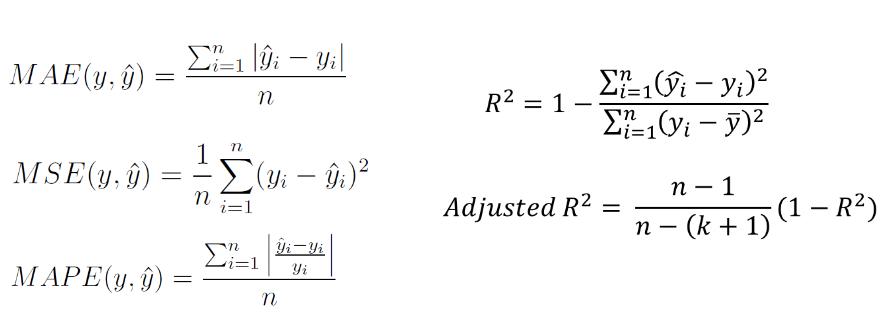

# Zadania praktyczne

# Zadanie 1: Zbuduj model prognozujący sprzedaż na podstawie pieniędzy wydanych na różne platformy marketingowe.

1) Pobierz dane ze strony: https://www.kaggle.com/datasets/ashydv/advertising-dataset
i umieść w tym samym folderze, co ten notatnik. Wczytaj dane za pomocą polecenia:
```
data = pd.read_csv("nazwa_pliku.csv").
```
Załóżmy, że chcemy przewidywać sprzedaż (kolumna `Sales`) na podstawie kwoty wydanej na reklamy w telewizji (`TV`) (określającej . Przypisz te dane za pomocą polecenia:
```
X = data["TV"]
y = data["SALES"]
```
2) Sprawdź czy w danych występują brakujące wartości.


3) Przedstaw dane na wykresie rozproszenia. Czy zależność między danymi jest widoczna? Czy jest liniowa? A może monotoniczna? Czy są widoczne obserwacje, które skrajnie odstają?


4) Oblicz korelację pomiędzy zmiennymi. Czy istnieje zależność między danymi?
    
    
5) Jak myślisz, który model będzie odpowiedni do rozwiązania problemu? Spróbuj przetestować dowolny model z zaimportowanych: LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor. 

##### Wczytywanie danych

In [ ]:
data = ...
X    = ...
y    = ...

##### Sprawdzenie czy w danych występują brakujące wartości

##### Wykres rozproszenia

#### Współczynniki korelacji

Do jego obliczenia możesz użyć np. 
   - funkcji ze scipy.stats (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html, 
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)
   - polecenia .corr(method=...) z pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

#### Krok opcjonalny
Opcjonalnie (jeśli jest taka potrzeba) możesz pomyśleć o transformacji danych lub o standaryzacji.

#### Podział na zbiór testowy i zbiór treningowy
Ustaw `test_size` z przedziału (0, 1). Jest to odsetek obserwacji, które zostaną przydzielone do zbioru testowego. Pozostałe posłużą do dopasowania modelu (tzw. zbiór treningowy). Często ustala się `test_size` na 0.2 lub 0.3. W skrajnych przypadkach na 0.5 (ale z reguły więcej danych wybiera się do zbioru treningowego).

In [ ]:
test_size = ... 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

####  Dopasowanie modelu

In [ ]:
model = ...
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#### Walidacja modelu

Możesz użyć np. podanych bibliotek:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

W przypadku danych o większej ilości zmiennych objaśniających (np. w zadaniu 2) możesz policzyć skorygowaną wersję R^2. Możesz to zrobić np. w ten sposób:
```
Adj_r2 = 1 - (1-r2_score(y, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
```

# Zadanie 2

W poprzednim zadaniu skupiliśmy się na sformułowaniu zależności między zmienną niezależną, a zmienną zależną. W tym zadaniu skupimy się na problemie, w którym mamy do dyspozycji więcej zmiennych objaśniających. Zmienną, której wartość chcemy przewidywać jest średnia cena awokado.
- Pobierz dane ze strony: https://www.kaggle.com/datasets/timmate/avocado-prices-2020
- Wykonaj ich preprocessing oraz przeprowadź analizę zależności. 
- Wybierz cechy, które chcesz uwzględnić w modelu. 
- Wybierz przynajmniej dwa modele, które chcesz wykorzystać do predykcji zmiennej objaśnianej. Jeśli to konieczne wykonaj odpowiednie transformacje danych.
- Porównaj ze sobą wybrane modele, wykorzystując zaprezentowane metryki. Jeśli w modelach używałeś/używałaś innej liczby zmiennych objaśniających, wówczas rozważ użycie r_squared_adjusted zamiast r_squared, ponieważ pierwszy z nich uwzglenia ilość zmiennych używanych w modelu do wyznaczania jego skuteczności.

# Zadanie 3*
W zadaniu 1 oraz zadaniu 2 rozważaliśmy modele, które nie uwzględniały zależności od czasu. Wyobraź sobie, że próbujesz przewidzieć przyszłą liczbę pasażerów pewnej linii lotniczej. 
- Pobierz plik `AirPassengers.csv` ze strony: https://www.kaggle.com/datasets/rakannimer/air-passengers
- Przygotuj dane do modelowania.
- Przeanalizuj dane.
- Podziel dane na zbiór testowy oraz zbiór treningowy względem indeksu czasowego (uwaga! nie można użyć polecenia `train_test_split`, ponieważ wybiera losowe indeksy danych do zbioru testowego i treningowego. Zamiast tego użyj operacji na listach/wektorach lub podziel dane bezpośrednio w DataFrame). Wykonaj zadanie w taki sposób, aby w zbiorze testowym znalazło się ostatnie 12 miesięcy z danych.
- Spróbuj zamodelować dane za pomocą modelu Prophet (https://pypi.org/project/prophet/) lub innego modelu, który znasz.